# Introduction

This notebook will show a couple of resampling methods and results using only the pandas resampling functions.

# Method

Show resample with and without fill to illustrate data loss.


# Results

- this illustrates the difference between the forward fill resampling and null-preserving resampling.

# Next Work



In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import WP19_analysis as wpa

In [3]:
vname = 'test'
energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
messages = wpa.load_message_file(vname + '-messages.csv')

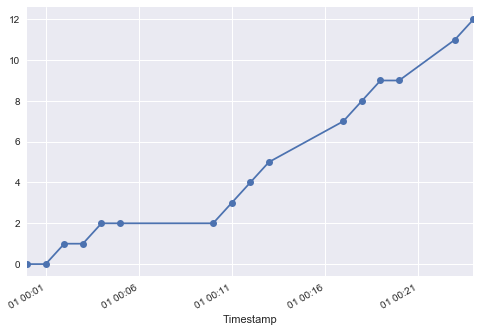

In [4]:
# here is the test data
# note that this data contains gaps
energy_data['kWh export'].plot(marker='o')

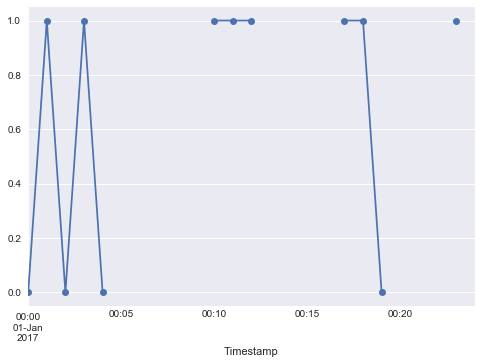

In [5]:
# this is the result of taking a pairwise difference
# notice that many samples are missing that may be accounted for in the power down and up messages
# the default for the difference is for the minute following
# the shift operator does this
energy_data['kWh export'].resample('1T').asfreq().diff().shift(-1).plot(marker='o')

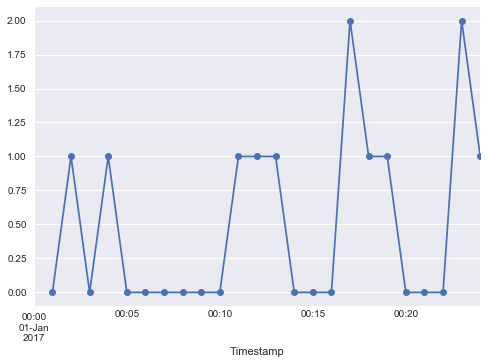

In [6]:
# if we fill the missing data (forward fill in this case) before diff we retain data
energy_data['kWh export'].resample('1T').ffill().diff().shift(0).plot(marker='o')

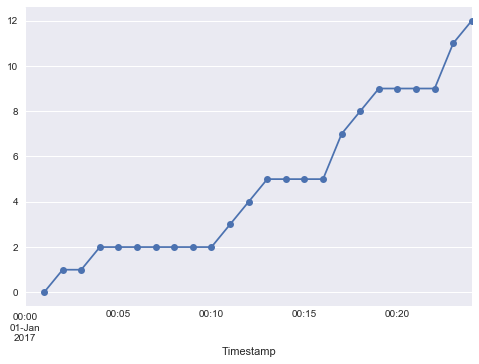

In [7]:
# this recreates the cumulative series from the forward filled diff
energy_data['kWh export'].resample('1T').ffill().diff().shift(0).cumsum().plot(marker='o')